In [2]:
import EddyDetectionV2 as eddy
import oceanspy as ospy
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.colors import Normalize
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.colors import SymLogNorm
from tqdm import tqdm
import ast
from matplotlib.animation import FuncAnimation, FFMpegFileWriter
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Set default font size to match LaTeX document
plt.rcParams.update({
    'font.size': 11,       # Default text size
    'axes.titlesize': 10,  # Title size
    'axes.labelsize': 10,  # Axis label size
    'xtick.labelsize': 8, # X-tick label size
    'ytick.labelsize': 8, # Y-tick label size
    'legend.fontsize': 8, # Legend font size
    'figure.titlesize': 12 # Figure title size
})

In [3]:
dfOWsurf = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/Eddies_fullYear.nc')['EddyDetection']

In [4]:
FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(70,75)).sel(X=slice(-22,2))
FWC = FWC.resample(time='D').mean(dim='time')

In [5]:
locMax_surf = pd.read_csv('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/locMAX.csv')
locMin_surf = pd.read_csv('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/locMin.csv')


In [6]:
display(locMax_surf)
IDs = [X[1] for X in locMax_surf.values]
print(IDs)

,Time,ID,Latitude,Longitude
0,0,['1'],71.079446,-9.051356
1,0,['2'],71.241831,-14.804034
2,0,['3'],71.278327,-10.910303
3,0,['4'],71.370250,-2.622462
4,0,['5'],71.444517,-8.921229
...,...,...,...,...
12422,364,['3140'],72.949224,-6.374665
12423,364,['3170'],73.281687,-17.847658
12424,364,['3156'],73.330735,-15.751358
12425,364,['3196'],73.430090,-12.556844


["['1']", "['2']", "['3']", "['4']", "['5']", "['6']", "['7']", "['8']", "['9']", "['10']", "['11']", "['12']", "['13']", "['14']", "['15']", "['16']", "['17']", "['18']", "['19']", "['20']", "['21']", "['22']", "['23']", "['24']", "['25']", "['26']", "['27']", "['28']", "['1']", "['29']", "['2']", "['5']", "['6']", "['8']", "['4']", "['9']", "['12']", "['13']", "['30']", "['16']", "['17']", "['18']", "['19']", "['20']", "['21']", "['23']", "['31']", "['32']", "['33']", "['34']", "['26']", "['35']", "['36']", "['37']", "['1']", "['38']", "['2']", "['3']", "['39']", "['5']", "['6']", "['8']", "['9']", "['12']", "['40']", "['17']", "['41']", "['30']", "['18']", "['19']", "['20']", "['23']", "['42']", "['43']", "['32']", "['44']", "['33']", "['27']", "['26']", "['36']", "['35']", "['37']", "['40']", "['2']", "['30']", "['49']", "['12']", "['8']", "['6']", "['42']", "['48']", "['39']", "['5']", "['1']", "['26']", "['50']", "['17a']", "['17b']", "['27']", "['4']", "['43']", "['3']", "['37']

In [7]:
display(len(np.unique(locMax_surf['Time'].values)),np.unique(locMax_surf['Time'].values))
display(locMax_surf[6450:6600])

365

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

,Time,ID,Latitude,Longitude
6450,181,['1667'],72.611856,-6.819280
6451,181,['1819'],72.633800,-11.905291
6452,181,['1830'],72.677913,-11.126342
6453,181,"['1324ab', '1324bb']",72.722330,-8.356052
6454,181,['1811'],72.789542,-13.782931
...,...,...,...,...
6595,185,['1816'],71.806927,-5.111922
6596,185,['1796'],71.826476,-8.050681
6597,185,['1773b'],71.865728,-13.036724
6598,185,"['1227cb', '1227bb']",71.885431,-10.392037


In [8]:
def convert_to_list(input_string):
    try:
        data = ast.literal_eval(input_string)
        data = [int(X) for X in data]
        return data
    except (ValueError, SyntaxError):
        return [input_string]

def convert_to_list_str(input_string):
    try:
        data = ast.literal_eval(input_string)
        return data
    except (ValueError, SyntaxError):
        return [input_string]
    

ID = locMin_surf['ID'].values
ID_min = [convert_to_list(ids) if isinstance(ids, str) else [(int(ids))] for ids in ID]
IDs_not_int_min = [X if isinstance(X[0],str) else None for X in ID_min]
IDs_int_min = []
for IDS in ID_min:
    if len(IDS) == 1:
        try:
            IDs_int_min.append(int(IDS[0]))
        except:
            pass

ID = locMax_surf['ID'].values
ID_max = [convert_to_list(ids) if isinstance(ids, str) else [(int(ids))] for ids in ID]
IDs_not_int_max = [X if isinstance(X[0],str) else None for X in ID_max]
IDs_int_max = []
for IDS in ID_max:
    if len(IDS) == 1:
        try:
            IDs_int_max.append(int(IDS[0]))
        except:
            pass


display(np.unique(IDs_int_max))
display(np.unique(IDs_int_min))
maximum_ID_num = np.max(np.unique(IDs_int_min))

IDs_not_int_max_fin = []
for i in IDs_not_int_max:
    if i is not None:
        IDs_not_int_max_fin.append(convert_to_list_str(i[0]))

IDs_not_int_min_fin = []
for i in IDs_not_int_min:
    if i is not None:
        IDs_not_int_min_fin.append(convert_to_list_str(i[0]))

print(len(locMax_surf)+len(locMin_surf))
display(IDs_not_int_max_fin,IDs_not_int_min_fin)

array([   1,    2,    3, ..., 3194, 3195, 3196])

array([3197, 3198, 3199, ..., 7492, 7493, 7494])

25377


[['17a'],
 ['17b'],
 ['13a'],
 ['13b'],
 ['13a'],
 ['5a'],
 ['5b'],
 ['13b'],
 ['12a'],
 ['12b'],
 ['5a'],
 ['5ba'],
 ['5bb'],
 ['46a'],
 ['46b'],
 ['13b'],
 ['5a'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['5a'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['13b'],
 ['5ba', '5bb'],
 ['12b', '12a'],
 ['13b'],
 ['102a'],
 ['102b'],
 ['6a'],
 ['6b'],
 ['12b', '12a'],
 ['5a'],
 ['5ba', '5bb'],
 ['13b'],
 ['12ba', '12aa'],
 ['12bb', '12ab'],
 ['102a', '102b'],
 ['5ba', '5bb'],
 ['13b'],
 ['6b'],
 ['102a', '102b'],
 ['12ba', '12aa'],
 ['5ba', '5bb'],
 ['13ba'],
 ['13bb'],
 ['12bb', '12ab'],
 ['6b'],
 ['5ba', '5bb'],
 ['6b'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['12ba', '12aa'],
 ['5baa', '5bba'],
 ['5bab', '5bbb'],
 ['6b'],
 ['6b'],
 ['5bba', '5baa'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5baa', '5bba'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5bba', '5baa'],
 ['12ba', '12aa'],
 ['13bb', '13ba'],
 ['102a', '102b'],
 ['5baa

[['3213a'],
 ['3213b'],
 ['3207a'],
 ['3207b'],
 ['3213b'],
 ['3207a'],
 ['3207b'],
 ['3213b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3207b'],
 ['3292a'],
 ['3292b'],
 ['3207b'],
 ['3239a'],
 ['3239b'],
 ['3292b'],
 ['3292b'],
 ['3207b'],
 ['3207b'],
 ['3239a'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3239a'],
 ['3316a'],
 ['3316b'],
 ['3292b'],
 ['3292b'],
 ['3316a'],
 ['3316b'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3207b'],
 ['3386a'],
 ['3386b'],
 ['3376a'],
 ['3316b', '3316a'],
 ['3376b'],
 ['3366a'],
 ['3366b'],
 ['3366a'],
 ['3316b', '3316a'],
 ['3386b'],
 ['3386a'],
 ['3207b'],
 ['3376a'],
 ['3376b'],
 ['3366a'],
 ['3386a'],
 ['3316b', '3316a'],
 ['3207b'],
 ['3376b'],
 ['3207b'],
 ['3452a'],
 ['3452b'],
 ['3316b', '3316a'],
 ['3376b'],
 ['3324a'],
 ['3324b'],
 ['3207b'],
 ['3316ba', '3316aa'],
 ['3316bb', '3316ab'],
 ['3376b'],
 ['3324a'],
 ['3324a'],
 ['3316aa', '3316ba'],
 ['3207b'],
 ['3376b'],
 ['3452

In [9]:
eddies_ID_max_t_surf = locMax_surf.set_index(['Time'])
eddies_ID_min_t_surf = locMin_surf.set_index(['Time'])

In [10]:
import re

def extract_parts(s):
    match = re.match(r'(\d+)([a-zA-Z]+)', s)
    if match:
        return [int(match.group(1)), match.group(2)]
    else:
        return [int(s),0]


ID_in_time = [[] for X in np.arange(maximum_ID_num)]

for i in range(0,365):
    eddyMax_ID = eddies_ID_max_t_surf.at[i,'ID'].values
    eddyMax_Lon = eddies_ID_max_t_surf.at[i,'Longitude'].values
    eddyMax_Lat = eddies_ID_max_t_surf.at[i,'Latitude'].values
    originIDs = [[[],[],[],[],[],[]] for X in range(len(eddyMax_ID))]
    for j,ID in enumerate(eddyMax_ID):
        ID = ast.literal_eval(ID)
        for IDS in ID:
            data = extract_parts(IDS)
            originIDs[j][0].append(data[0])
            originIDs[j][1].append(data[1])
        originIDs[j][2].append(eddyMax_Lon[j])
        originIDs[j][3].append(eddyMax_Lat[j])
        originIDs[j][4].append(i)
        originIDs[j][5].append(0)
    
    for IDS in originIDs:
        for subIDS in IDS[0]:
            ID_in_time[subIDS-1].append(IDS)
    
    eddyMin_ID = eddies_ID_min_t_surf.at[i,'ID'].values
    eddyMin_Lon = eddies_ID_min_t_surf.at[i,'Longitude'].values
    eddyMin_Lat = eddies_ID_min_t_surf.at[i,'Latitude'].values
    originIDs = [[[],[],[],[],[],[]] for X in range(len(eddyMin_ID))]
    for j,ID in enumerate(eddyMin_ID):
        ID = ast.literal_eval(ID)
        for IDS in ID:
            data = extract_parts(IDS)
            originIDs[j][0].append(data[0])
            originIDs[j][1].append(data[1])
        originIDs[j][2].append(eddyMin_Lon[j])
        originIDs[j][3].append(eddyMin_Lat[j])
        originIDs[j][4].append(i)
        originIDs[j][5].append(1)
    
    for IDS in originIDs:
        for subIDS in IDS[0]:
            ID_in_time[subIDS-1].append(IDS)


eddy_duration = []
eddy_duration_max = []
eddy_duration_min = []
for eddy in ID_in_time:
    try:
        eddy_duration.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        if eddy[0][-1][0] == 0:
            eddy_duration_max.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        elif eddy[0][-1][0] == 1:
            eddy_duration_min.append(int(eddy[-1][-2][0]-eddy[0][-2][0]+1))
        else:
            print('Error')
    except:
        print(eddy,'Error')
print('Max:',np.max(eddy_duration))

display(len(eddy_duration_max))

Max: 178


3196

In [26]:
import json

display(ID_in_time[1978][0],ID_in_time[1978][-1])

with open('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/ID_in_time.json', 'w') as f:
    json.dump(ID_in_time, f)

[[1979], [0], [-12.165578744999994], [72.65581885499999], [195], [0]]

[[1979, 2472, 1979, 1979, 1979, 1979, 1979, 1979, 2472, 1979],
 ['aabbba',
  'a',
  'abbbbb',
  'aabbbb',
  'babbbb',
  'abbbba',
  'babbba',
  'bbbbbb',
  'b',
  'bbbbba'],
 [-10.867105779999994],
 [71.18737249499999],
 [364],
 [0]]

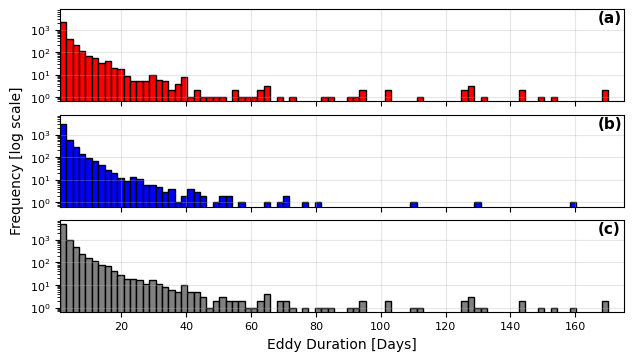

In [10]:
fig, ax = plt.subplots(3,1,sharex=True,sharey=True,
    figsize=(6.2217,3.5), layout='constrained'
)
ax[0].hist(eddy_duration_max,bins=90,range=(1, max(eddy_duration)),log=True,edgecolor='k',color='r')
ax[0].set_xlim(1,175)
ax[0].grid(alpha=0.3)

ax[1].hist(eddy_duration_min,bins=90,range=(1, max(eddy_duration)),log=True,edgecolor='k',color='b')
ax[1].set_xlim(1,175)
ax[1].set_ylabel('Frequency [log scale]')
ax[1].grid(alpha=0.3)

ax[2].hist(eddy_duration,bins=90,range=(1, max(eddy_duration)),log=True,edgecolor='k',color='grey')
ax[2].set_xlim(1,175)
ax[2].set_xlabel('Eddy Duration [Days]')
ax[2].grid(alpha=0.3)

ax[0].annotate('(a)',xy=[167,2000],fontweight='bold')
ax[1].annotate('(b)',xy=[167,2000],fontweight='bold')
ax[2].annotate('(c)',xy=[167,2000],fontweight='bold')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDurationHist',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [11]:
# def is_closed_contour(vertices, tol=1e-5):
#                 distance = np.linalg.norm(vertices[0] - vertices[-1])
#                 return distance < tol


# # Process Contour Paths to Handle Jumps
# def process_contour_path(vertices, jump_threshold=0.2):
#     segments = []
#     current_segment = [vertices[0]]
    
#     for i in range(1, len(vertices)):
#         if np.linalg.norm(vertices[i] - vertices[i-1]) > jump_threshold:
#             segments.append(np.array(current_segment))
#             current_segment = [vertices[i]]
#         else:
#             current_segment.append(vertices[i])
    
#     if current_segment:
#         segments.append(np.array(current_segment))
    
#     return segments


# time_ = np.arange(180,215)
# for time in time_:
#     fig, ax = plt.subplots(
#         figsize=(12,6),layout='constrained'
#     )
#     contour = ax.contourf(dfOWsurf.X,dfOWsurf.Y,dfOWsurf[time],[0,1],colors='white')
#     ax.grid()
#     all_contour_points = []

#     for collection in contour.collections:
#         for path in collection.get_paths():
#             # Collect the vertices of the path
#             vertices = path.vertices
#             all_contour_points.append(vertices)

#     processed_contour_segments = []
#     for vertices in all_contour_points:
#         segments = process_contour_path(vertices)
#         processed_contour_segments.extend(segments)
    
#     for vertices in processed_contour_segments:
#         ax.plot(vertices[:, 0], vertices[:, 1], 'r-', linewidth=0.5)


#     data_ID = eddies_ID_max_t_surf.at[time,'ID'].values
#     data_LON = eddies_ID_max_t_surf.at[time,'Longitude'].values
#     data_LAT = eddies_ID_max_t_surf.at[time,'Latitude'].values
#     for i in range(len(data_ID)):
#         for vertices in processed_contour_segments:
#             region = Path(vertices)
#             if region.contains_point((data_LON[i],data_LAT[i])):
#                 ax.annotate(str(data_ID[i]),[data_LON[i],data_LAT[i]],fontsize=5)
    
#     contour = ax.contourf(dfOWsurf.X,dfOWsurf.Y,dfOWsurf[time],[1.5,2],colors='white')

#     all_contour_points = []

#     for collection in contour.collections:
#         for path in collection.get_paths():
#             # Collect the vertices of the path
#             vertices = path.vertices
#             all_contour_points.append(vertices)

#     processed_contour_segments = []
#     for vertices in all_contour_points:
#         segments = process_contour_path(vertices)
#         processed_contour_segments.extend(segments)
    
#     for vertices in processed_contour_segments:
#         ax.plot(vertices[:, 0], vertices[:, 1], 'b-', linewidth=0.5)

#     data_ID = eddies_ID_min_t_surf.at[time,'ID'].values
#     data_LON = eddies_ID_min_t_surf.at[time,'Longitude'].values
#     data_LAT = eddies_ID_min_t_surf.at[time,'Latitude'].values
#     for i in range(len(data_ID)):
#         for vertices in processed_contour_segments:
#             region = Path(vertices)
#             if region.contains_point((data_LON[i],data_LAT[i])):
#                 ax.annotate(str(data_ID[i]),[data_LON[i],data_LAT[i]],fontsize=5)
    
#     ax.pcolormesh(FWC.X,FWC.Y,FWC[time],cmap=cmo.haline_r,vmin=0,vmax=10)
#     ax.set_title(str(FWC.time.values[time])[0:10])

In [12]:
eddy_ID_area = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/EddyResults/Tracking/EddyAreaID.nc')['EddyID']
Area_r = xr.open_dataset('/nird/projects/NS9608K/MSc_EK/Data/rA.nc')['rA'].sel(X=slice(-20,0),Y=slice(71,74))
display(Area_r)

TypeError: _ArrayMemoryError.__init__() missing 1 required positional argument: 'dtype'

In [ ]:
Area = Area_r
Area_ = Area_r

In [ ]:
np.unique(eddy_ID_area.isel(time=2).values)

array(['0', "['1']", "['12']", "['17']", "['18']", "['19']", "['2']",
       "['20']", "['23']", "['26']", "['27']", "['3']", "['30']",
       "['3198']", "['3199']", "['32']", "['3201']", "['3203']",
       "['3204']", "['3205']", "['3207a']", "['3207b']", "['3211']",
       "['3213b']", "['3214']", "['3215']", "['3217']", "['3218']",
       "['3221']", "['3223']", "['3225']", "['3228']", "['3230', '3231']",
       "['3235']", "['3236']", "['3237']", "['3239']", "['3240']",
       "['3243']", "['3245']", "['3246']", "['3247']", "['3248']",
       "['3249']", "['3250']", "['3251']", "['3252']", "['3253']",
       "['3254']", "['3255']", "['3256']", "['33']", "['35']", "['36']",
       "['37']", "['38']", "['39']", "['40']", "['41']", "['42']",
       "['43']", "['44']", "['5']", "['6']", "['8']", "['9']"],
      dtype=object)

In [ ]:
eddyDensity = xr.zeros_like(eddy_ID_area[0],dtype=float)
cond = (eddy_ID_area != '0')
Area = Area.where(cond)
Area = Area.sum(dim=['X','Y'])
Area_ = Area_.sum(dim=['X','Y'])

Area = Area / Area_

for time in range(len(eddy_ID_area)):
    cond = (eddy_ID_area[time] != '0')
    update = eddyDensity.where(~cond,other=eddyDensity + 1)
    eddyDensity = update

eddyDensity = eddyDensity/len(eddy_ID_area)

In [ ]:
depth = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/Depth_res.nc')['Depth'].sel(Y=slice(70,75)).sel(X=slice(-22,2))
depth_no_nan = depth
depth = depth.where(depth > 0, np.nan)

In [ ]:
eddyDensity = eddyDensity.where(eddyDensity>0)

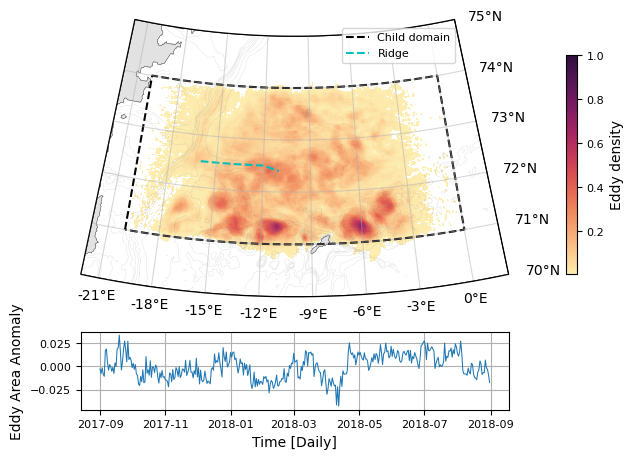

In [ ]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(
    figsize=(6.2217,4.5), layout = 'constrained'
)
gs = GridSpec(2, 1, height_ratios=[0.8, 0.2],figure=fig)

ax = fig.add_subplot(gs[0],projection=ccrs.NorthPolarStereo(central_longitude=-10))

extent = [-22+10,2+10,70,75]

mesh = ax.pcolormesh(eddyDensity.X,eddyDensity.Y,eddyDensity,cmap=cmo.matter,vmax=1,transform=ccrs.PlateCarree())
cbar = fig.colorbar(mesh, ax=ax, shrink=0.7,pad=0.01)
cbar.set_label('Eddy density')

land = depth_no_nan.where(depth_no_nan==0)

ax.pcolormesh(land.X,land.Y,land,cmap='Greys',vmin=-25,vmax=100,zorder=0, transform=ccrs.PlateCarree())

# Define the coordinates of the box in PlateCarree projection
lon_coords = [-20, -20, 0, 0, -20]
lat_coords = [71, 74, 74, 71, 71]

# Interpolate more points along the edges of the box
num_points = 100
lon_interp = np.linspace(lon_coords[0], lon_coords[1], num_points)
lat_interp = np.linspace(lat_coords[0], lat_coords[1], num_points)

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[1], lon_coords[2], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[1], lat_coords[2], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[2], lon_coords[3], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[2], lat_coords[3], num_points)])

lon_interp = np.concatenate([lon_interp, np.linspace(lon_coords[3], lon_coords[4], num_points)])
lat_interp = np.concatenate([lat_interp, np.linspace(lat_coords[3], lat_coords[4], num_points)])

# Transform the interpolated coordinates to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo(central_longitude=-10)
transformed_coords = proj.transform_points(ccrs.PlateCarree(), lon_interp, lat_interp)

# Extract the transformed x and y coordinates
x_coords = transformed_coords[:, 0]
y_coords = transformed_coords[:, 1]

# Plot the transformed coordinates
ax.plot(x_coords, y_coords, color='k', linestyle='--', transform=ax.transData,label='Child domain', zorder=2)

lon = depth['XC']
lat = depth['YC']
# Add land contour
ax.contour(lon, lat, depth_no_nan, [0], colors='black', linewidths=0.25,zorder=0, transform=ccrs.PlateCarree())
ax.contour(lon, lat, depth_no_nan, [300,400,500,750,1000,1500,2000], colors='grey', linewidths=0.25,alpha=0.3, transform=ccrs.PlateCarree())
ax.plot([-16,-15,-14,-13,-12,-11],[72.5,72.5,72.5,72.5,72.5,72.4],linestyle='--',color='c',label='Ridge',transform=ccrs.PlateCarree())

# Create a custom path for the extent in PlateCarree projection
num_points = 100
bottom_lons = np.linspace(extent[0], extent[1], num_points)
top_lons = np.linspace(extent[1], extent[0], num_points)
bottom_lats = np.full_like(bottom_lons, extent[2])
top_lats = np.full_like(top_lons, extent[3])

# Combine the vertices
verts = np.vstack([
    np.column_stack([bottom_lons, bottom_lats]),
    np.column_stack([top_lons, top_lats])
])

# Transform the vertices to the NorthPolarStereo projection
proj = ccrs.NorthPolarStereo()
verts_proj = proj.transform_points(ccrs.PlateCarree(), verts[:, 0], verts[:, 1])
verts_proj = verts_proj[:, :2]  # Only keep x and y coordinates

# Create the path
codes = [Path.MOVETO] + [Path.LINETO] * (len(verts_proj) - 1) + [Path.CLOSEPOLY]
path = Path(np.vstack([verts_proj, verts_proj[0]]), codes)
patch = PathPatch(path, transform=ax.transData, edgecolor='black', facecolor='none')
ax.add_patch(patch)

# Set the boundary using the transformed path
ax.set_boundary(patch.get_path(), transform=ax.transData)

# Add gridlines without labels
gl = ax.gridlines(draw_labels=False,alpha=0.5)

# Manually add the labels for the bottom and right sides
xticks = np.arange(extent[0]-9, extent[1]-10 + 1, 3)  # Adjust the range and step as needed
yticks = np.arange(extent[2], extent[3] + 1, 1)  # Adjust the range and step as needed

# Add bottom labels
for xtick in xticks:
    ax.text(xtick, extent[2]-0.2, f'{xtick}°E', transform=ccrs.PlateCarree(),
            fontsize=10, ha='center', va='top')

# Add right labels
for ytick in yticks:
    ax.text(extent[1] + 1-10, ytick, f'{ytick}°N', transform=ccrs.PlateCarree(),
            fontsize=10, ha='left', va='center')
    
ax.legend(loc=(0.61,0.85))
######################## ax2

ax2 = fig.add_subplot(gs[1])
ax2.plot(Area.time,Area-Area.mean(), linewidth = 0.75)
ax2.set_ylabel('Eddy Area Anomaly')
ax2.set_xlabel('Time [Daily]')
ax2.grid()


# Save the figure
fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyDensity',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [ ]:
time_ = np.arange(0,365)
loc_Max_len_t = [len(eddies_ID_max_t_surf.at[time, 'ID']) for time in time_]
loc_Min_len_t = [len(eddies_ID_min_t_surf.at[time, 'ID']) for time in time_]
tot_eddy_t = [loc_Max_len_t[time] + loc_Min_len_t[time] for time in time_]

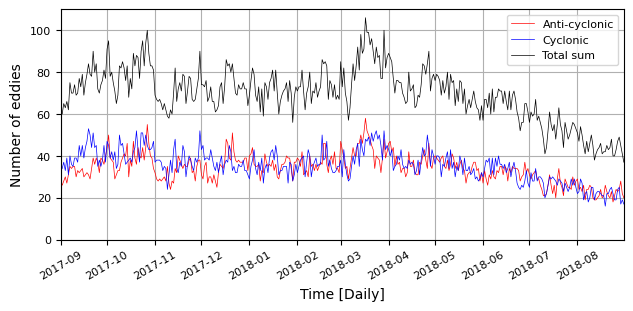

In [ ]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout='constrained'
)

ax.plot(Area.time, loc_Max_len_t, linewidth=0.5, color='r',label='Anti-cyclonic')
ax.plot(Area.time, loc_Min_len_t, linewidth=0.5, color='b',label='Cyclonic')
ax.plot(Area.time, tot_eddy_t, linewidth=0.5, color='k',label='Total sum')

ax.grid()
ax.set_ylabel('Number of eddies')
ax.set_xlabel('Time [Daily]')
ax.set_ylim(0,110)
ax.set_xlim(Area.time[0],Area.time[-1])
plt.xticks(rotation=30)
ax.legend(loc='upper right')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyNumTime',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

In [ ]:
locMax_surf

,Time,ID,Latitude,Longitude
0,0,['1'],71.079446,-9.051356
1,0,['2'],71.241831,-14.804034
2,0,['3'],71.278327,-10.910303
3,0,['4'],71.370250,-2.622462
4,0,['5'],71.444517,-8.921229
...,...,...,...,...
12422,364,['3140'],72.949224,-6.374665
12423,364,['3170'],73.281687,-17.847658
12424,364,['3156'],73.330735,-15.751358
12425,364,['3196'],73.430090,-12.556844


# Compute eddy radius

In [ ]:
radius_values_max = []
for time in range(0,365):
    eddy = eddies_ID_max_t_surf.at[time,'ID']
    for ID in eddy:
        cond = eddy_ID_area[time] == ID
        radius_ID = np.sqrt(Area_r.where(cond).sum() / np.pi)
        radius_values_max.append(radius_ID.values/1000)

In [ ]:
radius_values_min = []
for time in range(0,365):
    eddy = eddies_ID_min_t_surf.at[time,'ID']
    for ID in eddy:
        cond = eddy_ID_area[time] == ID
        radius_ID = np.sqrt(Area_r.where(cond).sum() / np.pi)
        radius_values_min.append(radius_ID.values/1000)

In [ ]:
display(np.max(radius_values_max),np.min(radius_values_max),len(radius_values_max))

33.05281307938102

0.9630542367729414

12427

/tmp/ipykernel_1129609/3297192416.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,10000)


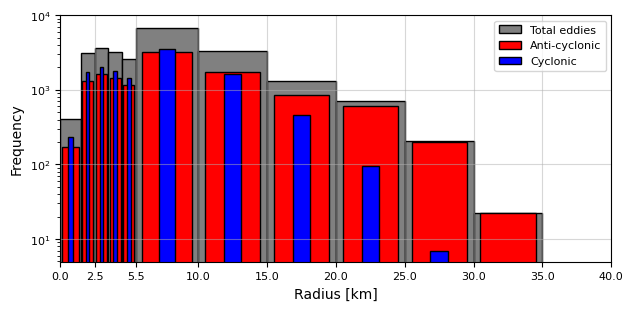

In [ ]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)
ax.hist(radius_values_max + radius_values_min,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='grey',label='Total eddies')
ax.hist(radius_values_max,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='r',rwidth=0.8,label='Anti-cyclonic')
ax.hist(radius_values_min,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='b', rwidth=0.25,label='Cyclonic')
ax.set_ylim(0,10000)
ax.set_xticks([0,2.5,5.5,10,15,20,25,30,35,40])
ax.set_xlim(0,40)
ax.grid(alpha=0.5)

ax.set_xlabel('Radius [km]')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyRadius',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)

# FWC and radius

In [ ]:
FWC = xr.open_dataset(r'/nird/projects/NS9608K/MSc_EK/Data/FWC_full_domain.nc')['__xarray_dataarray_variable__'].sel(Y=slice(70,75)).sel(X=slice(-22,2))
FWC = FWC.resample(time='D').mean(dim='time')

In [ ]:
radius_values_max_FW = []
for time in range(0,365):
    eddy = eddies_ID_max_t_surf.at[time,'ID']
    for ID in eddy:
        cond = eddy_ID_area[time].sel(X=slice(-16.5,0)) == ID
        if np.nanmean(FWC[time].where(cond)) >= 5:
            radius_ID = np.sqrt(Area_r.where(cond).sum() / np.pi)
            radius_values_max_FW.append(radius_ID.values/1000)

/tmp/ipykernel_1129609/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3888080925.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/388808092

In [ ]:
radius_values_min_FW = []
for time in range(0,365):
    eddy = eddies_ID_min_t_surf.at[time,'ID']
    for ID in eddy:
        cond = eddy_ID_area[time].sel(X=slice(-16.5,0)) == ID
        if np.nanmean(FWC[time].where(cond)) >= 5:
            radius_ID = np.sqrt(Area_r.where(cond).sum() / np.pi)
            radius_values_min_FW.append(radius_ID.values/1000)

/tmp/ipykernel_1129609/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/3763324039.py:6: RuntimeWarning: Mean of empty slice
  if np.nanmean(FWC[time].where(cond)) >= 5:
/tmp/ipykernel_1129609/376332403

/tmp/ipykernel_1129609/1043508886.py:7: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0,1000)


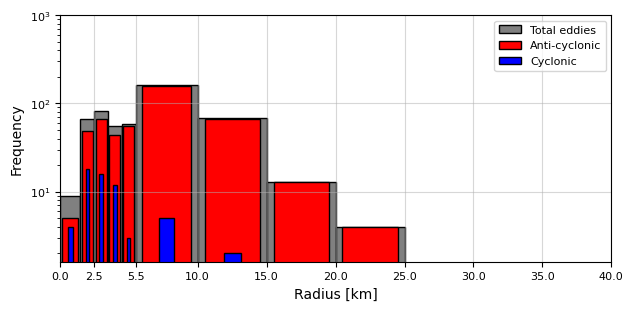

In [ ]:
fig, ax = plt.subplots(
    figsize=(6.2217,3), layout = 'constrained'
)
ax.hist(radius_values_max_FW + radius_values_min_FW,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='grey',label='Total eddies')
ax.hist(radius_values_max_FW,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='r',rwidth=0.8,label='Anti-cyclonic')
ax.hist(radius_values_min_FW,log=True,edgecolor='k',bins=[0,1.5,2.5,3.5,4.5,5.5,10,15,20,25,30,35,40],color='b', rwidth=0.25,label='Cyclonic')
ax.set_ylim(0,1000)
ax.set_xticks([0,2.5,5.5,10,15,20,25,30,35,40])
ax.set_xlim(0,40)
ax.grid(alpha=0.5)

ax.set_xlabel('Radius [km]')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

fig.savefig(r'/nird/home/ekv036/MSc/Fig/EddyRadiusFW',dpi=300, facecolor='w', edgecolor='w',
          orientation='landscape', format=None,
          transparent=False, bbox_inches=None,pad_inches=0.25)